<a href="https://colab.research.google.com/github/akkinapellisaicharan14/Uber-Data-Analysis/blob/main/UDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/UberDataset.csv')
dataset.head

<bound method NDFrame.head of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1  

In [72]:
dataset= dataset.replace({"CATEGORY":{"Business":0, "Personal":1 }})
dataset= dataset.replace({"PURPOSE":{"Meal/Entertain":1, "Meeting":0 ,"Customer Visit":2,"Errand/Supplies":3,"Temporary Site":4 ,"NOT":5,"Between Offices":6,"Moving":7,"Airport/Travel":8,"Commute":9,"Charity ($)":10}})
dataset= dataset.replace({"day-night":{"Morning":1, "Afternoon":0,"Evening":2, "Night":3 }})

In [ ]:
dataset.shape

(1156, 7)

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
dataset['PURPOSE'].fillna("NOT", inplace=True)

In [ ]:

dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
                                       errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
                                     errors='coerce')

In [ ]:
from datetime import datetime
 
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour
 
#changing into categories of day and night
dataset['day-night'] = pd.cut(x=dataset['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [ ]:

dataset.dropna(inplace=True)

In [ ]:

dataset.drop_duplicates(inplace=True)

In [ ]:

obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
 
unique_values = {}
for col in object_cols:
  unique_values[col] = dataset[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 175, 'STOP': 186, 'PURPOSE': 11, 'date': 291}

In [87]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,1,Fort Pierce,Fort Pierce,5.1,1,2016-01-01,21.0,3,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,1,Fort Pierce,Fort Pierce,5.0,5,2016-01-02,1.0,1,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,1,Fort Pierce,Fort Pierce,4.8,3,2016-01-02,20.0,3,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,1,Fort Pierce,Fort Pierce,4.7,0,2016-01-05,17.0,2,Jan,Tues
4,2016-01-06 14:42:00,2016-01-06 15:49:00,1,Fort Pierce,West Palm Beach,63.7,2,2016-01-06,14.0,0,Jan,Wed


In [ ]:
dataset['CATEGORY'].value_counts()

Business    1060
Personal      75
Name: CATEGORY, dtype: int64

(array([0]), [Text(0, 0, '0')])

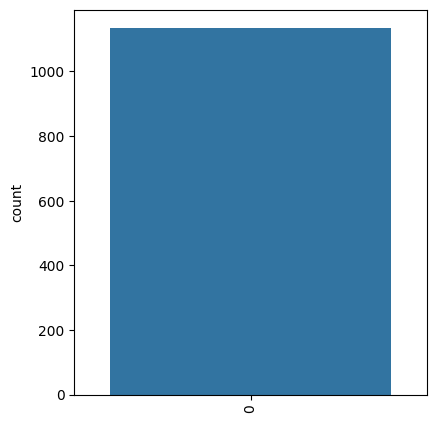

In [63]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(dataset['CATEGORY'])
plt.xticks(rotation=90)





(array([0]), [Text(0, 0, '0')])

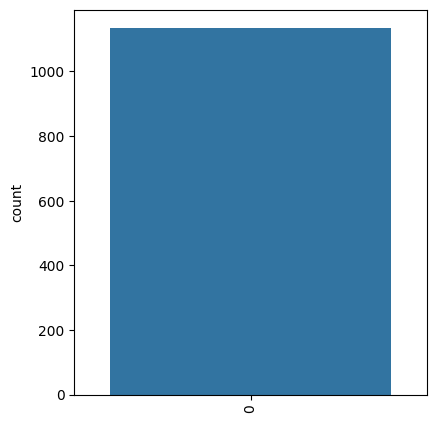

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.countplot(dataset['PURPOSE'])
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, '0')])

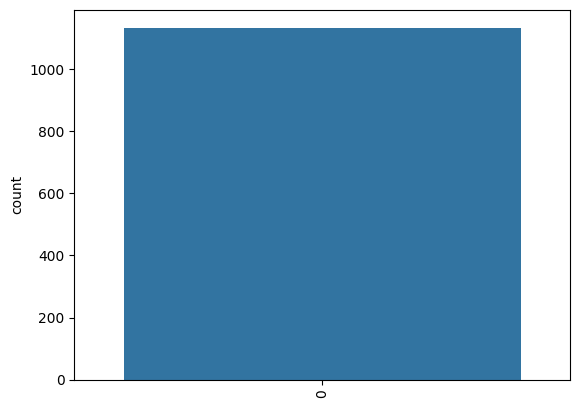

In [74]:
sns.countplot(dataset['day-night'])
plt.xticks(rotation=90)

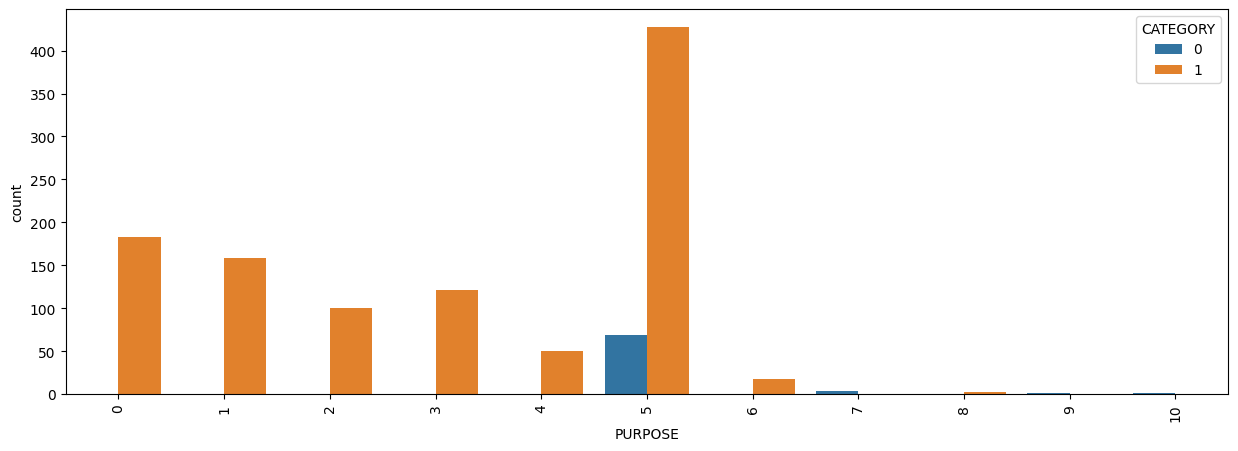

In [88]:
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

<ipython-input-89-9f61677ebc56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

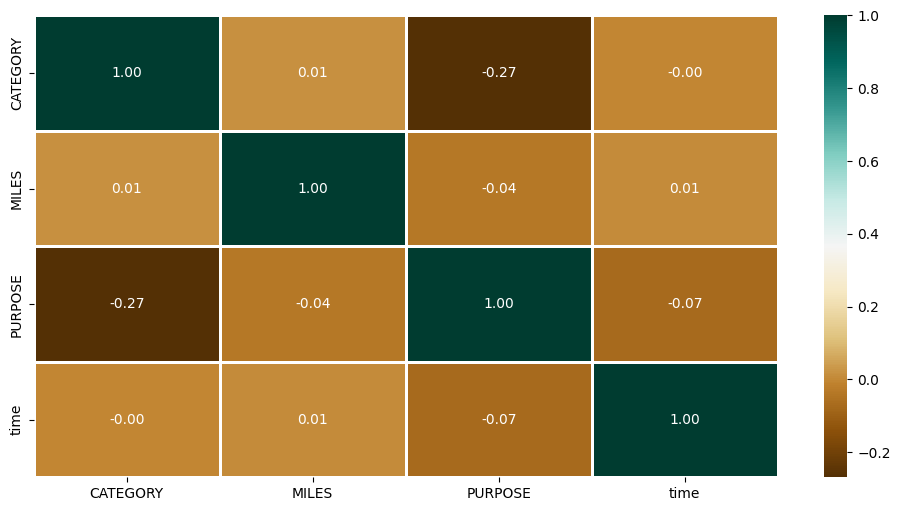

In [89]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

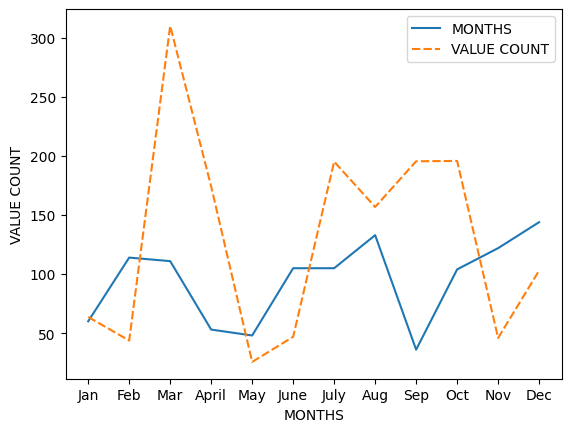

In [90]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
dataset["MONTH"] = dataset.MONTH.map(month_label)
 
mon = dataset.MONTH.value_counts(sort=False)
 
# Month total rides count vs Month ride max count
df = pd.DataFrame({"MONTHS": mon.values,
                   "VALUE COUNT": dataset.groupby('MONTH',
                                                  sort=False)['MILES'].max()})
 
p = sns.lineplot(data=df)
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")

In [82]:

dataset['DAY'] = dataset.START_DATE.dt.weekday
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
dataset['DAY'] = dataset['DAY'].map(day_label)

Text(0, 0.5, 'COUNT')

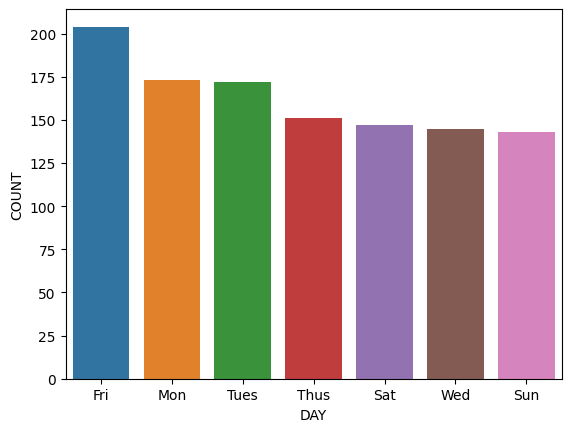

In [91]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT')


<Axes: >

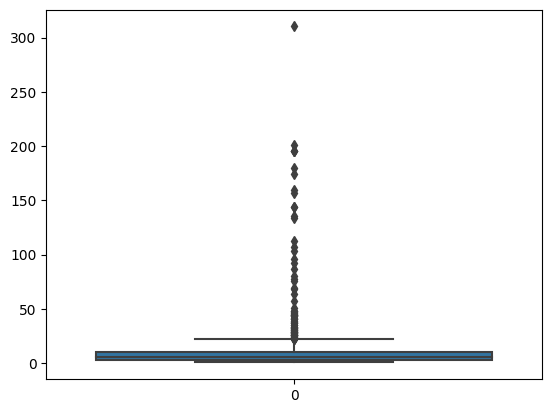

In [84]:

sns.boxplot(dataset['MILES'])

<Axes: >

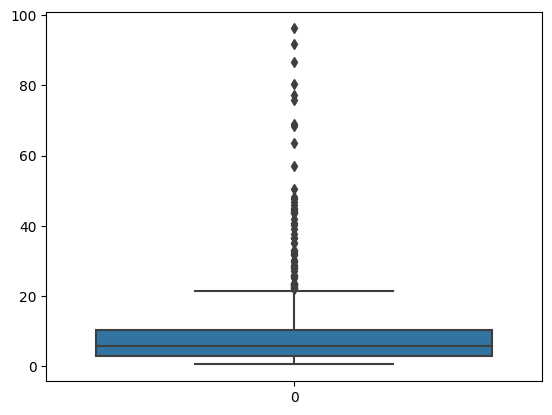

In [92]:

sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<ipython-input-93-1d5904d4eb1d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

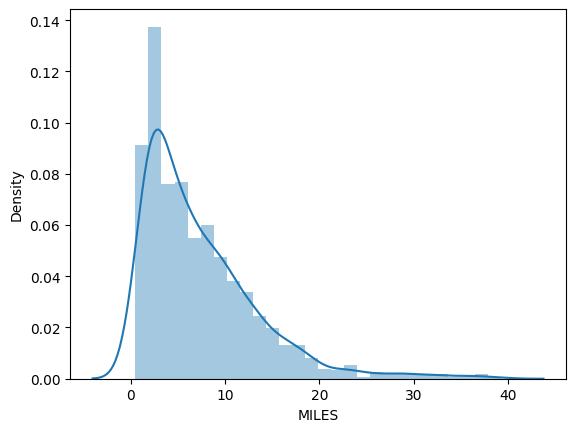

In [93]:

sns.distplot(dataset[dataset['MILES']<40]['MILES'])